In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import logging

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [4]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
class_names = [
'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete',
'Ocho', 'Nueve'
]

In [7]:
num_train_examples = metadata.splits['train'].num_examples #60 mil datos train
num_test_examples = metadata.splits['test'].num_examples #10 mil datos test

In [8]:
#Normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [9]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [10]:
#Estructura de la red
model = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28,1)), #Capa de entrada
     tf.keras.layers.Dense(64, activation=tf.nn.relu), #Capas oculta
     tf.keras.layers.Dense(64, activation=tf.nn.relu), #Capas oculta
     tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para clasificacion
])

In [11]:
#Función que compila el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
#Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

In [13]:
#Realizar el aprendizaje
model.fit(
    train_dataset, epochs=5,
    steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE)
)

Epoch 1/5
1875/1875 [==============================] - 18s 5ms/step - loss: 0.2827 - accuracy: 0.9183
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1288 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0906 - accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0728 - accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0576 - accuracy: 0.9821


In [14]:
#Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples/32)
)

#Imprime los resultados de precisión
print("Resultado en las pruebas: ", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.1038 - accuracy: 0.9680
Resultado en las pruebas:  0.9679999947547913


In [16]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)


def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#888888")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

1/1 [==============================] - 0s 26ms/step


--------------------------
> DANIEL PLATA VELAZQUEZ <
--------------------------


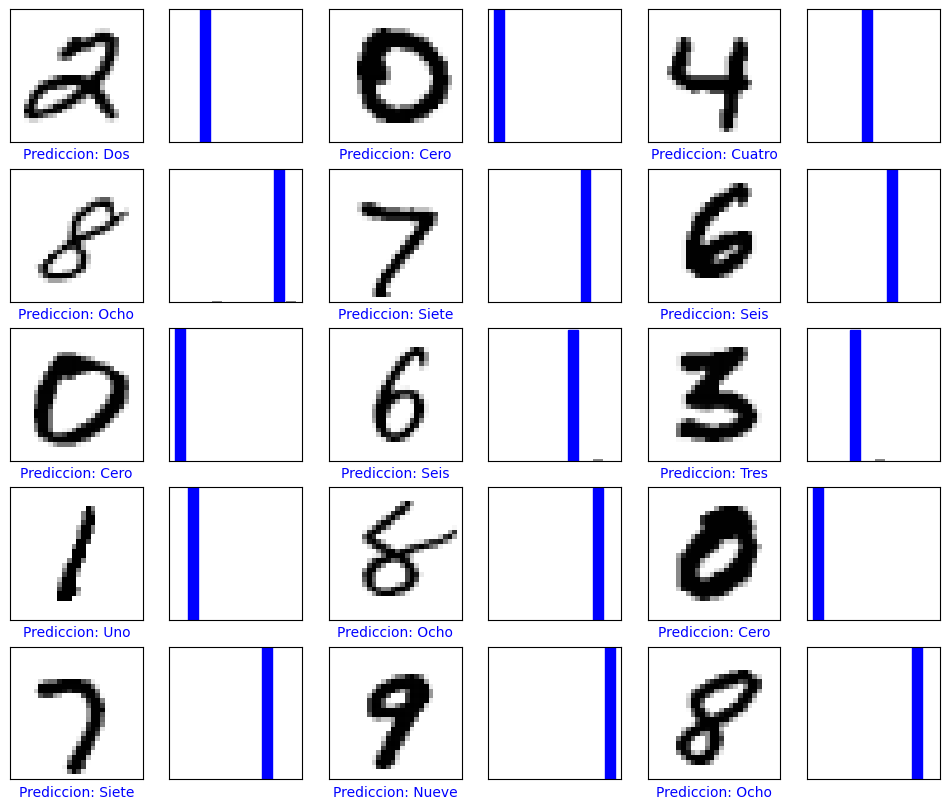

In [22]:
print("--------------------------")
print("> DANIEL PLATA VELAZQUEZ <")
print("--------------------------")

numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()


In [ ]:
#Probar una imagen suelta
imagen = imagenes_prueba[4] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)
print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])
